In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# # Loading drive options
from google.colab import drive
drive.mount('/content/drive')

# Load the data
df1=pd.read_csv('/content/drive/MyDrive/Time_Series_Course/covid-data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's study our DataSet. As you can see, it consist of 159321 rows × 67 columns. There is some missing data are observed in the DataSet. We should be sure that Python recognized types of data correctly.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187801 entries, 0 to 187800
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    187801 non-null  object 
 1   continent                                   176870 non-null  object 
 2   location                                    187801 non-null  object 
 3   date                                        187801 non-null  object 
 4   total_cases                                 180399 non-null  float64
 5   new_cases                                   180190 non-null  float64
 6   new_cases_smoothed                          179016 non-null  float64
 7   total_deaths                                162023 non-null  float64
 8   new_deaths                                  162021 non-null  float64
 9   new_deaths_smoothed                         160860 non-null  float64
 

As you can see, 66 columns of COVID-19 data were recognized correctly (float64). First 4 columns and tests_units were recognized as objects. Let's investigate them:


In [ ]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
df1[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
187796,ZWE,Africa,Zimbabwe,tests performed
187797,ZWE,Africa,Zimbabwe,tests performed
187798,ZWE,Africa,Zimbabwe,tests performed
187799,ZWE,Africa,Zimbabwe,tests performed


Let's show information about the field date.


In [ ]:
df1['date']

,date
0,2020-02-24
1,2020-02-25
2,2020-02-26
3,2020-02-27
4,2020-02-28
...,...
187796,2022-05-15
187797,2022-05-16
187798,2022-05-17
187799,2022-05-18


### Сhange the data types of columns


As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **pandas.astype()**.

The field 'data' should be converted into DataTime type **pandas.to_datetime**
To see the results we can use **pandas.describe()**.


In [ ]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
df1[fields] =df1[fields].astype('category')
df1.loc[:, 'date'] = pd.to_datetime(df1['date'])
df1[fields].describe()

,iso_code,continent,location,tests_units
count,187801,176870,187801,101893
unique,244,6,244,4
top,ARG,Africa,Mexico,tests performed
freq,870,43543,870,75951


### Rows filtering


As we can see, the DataSet contains information about 6 continents and 238 countries.
The field 'tests_units' consist of 4 categories. To show a list of countries, we can use **pandas.Series.cat.categories**.


In [ ]:
df1['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=244)

Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use India for saving models and further forecast. You can use your country. Let's use a pandas filter to do this.


In [ ]:
df1.index = df1['date']
c_covid = df1[df1['location'] == "India"]
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,IND,Asia,India,2020-01-30 00:00:00,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-01-31,IND,Asia,India,2020-01-31 00:00:00,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-01,IND,Asia,India,2020-02-01 00:00:00,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-02,IND,Asia,India,2020-02-02 00:00:00,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-03,IND,Asia,India,2020-02-03 00:00:00,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,IND,Asia,India,2022-05-15 00:00:00,43123801.0,2202.0,2628.571,524241.0,27.0,21.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2022-05-16,IND,Asia,India,2022-05-16 00:00:00,43125370.0,1569.0,2525.857,524260.0,19.0,22.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2022-05-17,IND,Asia,India,2022-05-17 00:00:00,43127199.0,1829.0,2373.286,524293.0,33.0,19.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


Let's choose the fields 'new_cases', 'new_cases_smoothed' for forecasting. First of all, we should visualize this data.


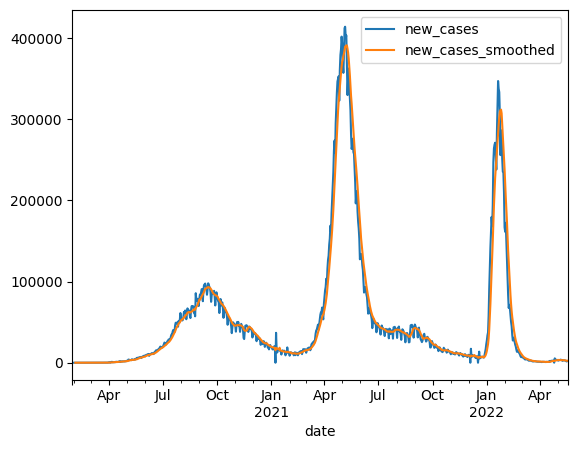

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'new_cases_smoothed']
c_covid[fields].plot()
plt.show()
plt.savefig('smooth.png')

### Elimination of missing data


As you can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves.
First of all, we should delete missing data using **pandas.DataFrame.dropna()**


In [ ]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,new_cases_smoothed
date,,
2020-02-04,0.0,0.429
2020-02-05,0.0,0.429
2020-02-06,0.0,0.286
2020-02-07,0.0,0.286
2020-02-08,0.0,0.286
...,...,...
2022-05-15,2202.0,2628.571
2022-05-16,1569.0,2525.857
2022-05-17,1829.0,2373.286


### Data transformation


 To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:

1.  duplicating of data and moving it vertically down for a certain number of days (lag)
2.  deleting the missing data at the beginning and end **pandas.DataFrame.shift()**
3.  calculating the correlation coefficient between the obtained series.

It is convenient to create a separate function for lag:


In [ ]:
def lag_correlation_ts(y, x, lag):
    """

    y: fixed
    x: shifted
    lag: lag for shifting
    r: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

Let's create a target DataSet.


In [ ]:
y_dataset = c_covid['new_cases']
y_dataset

,new_cases
date,
2020-02-04,0.0
2020-02-05,0.0
2020-02-06,0.0
2020-02-07,0.0
2020-02-08,0.0
...,...
2022-05-15,2202.0
2022-05-16,1569.0
2022-05-17,1829.0


In [ ]:
# import pandas as pd
# import numpy as np
# import datetime

# mon_ind = c_covid['new_cases'].month
# mon_ind


# c_covid.groupby(pd.PeriodIndex(c_covid['Date'], freq="M"))['Value'].mean()

# c_covid
# df.resample('MS').sum()
# y_dataset

c_covid[['new_cases', 'new_cases_smoothed']]
# Sum all the month count with date as month end
monthly_data1_enddate = c_covid[['new_cases', 'new_cases_smoothed']].resample('M').sum()
monthly_data1_enddate

monthly_data1_startdate = c_covid[['new_cases', 'new_cases_smoothed']].resample('MS').sum()
monthly_data1_startdate

monthly_data2_asOn1st = c_covid[c_covid.index.day == 1][['new_cases', 'new_cases_smoothed']]
monthly_data2_asOn1st



y_dataset = c_covid['new_cases']
# print('y_dataset= \n',y_dataset)
# y_dataset.plot()

# y_dataset.to_csv('F:/18_August_2023/Parameter_Estimation_Data_Fitting/Python/COVID_India-extr.csv')

# COVID_India=pd.read_csv('F:/18_August_2023/Parameter_Estimation_Data_Fitting/Python/COVID_India-extr.csv')







Let's test a 50-day lag.


     Correlation
Lag             
0         1.0000
1         0.9947
2         0.9867
3         0.9783
4         0.9680
..           ...
96       -0.1977
97       -0.1972
98       -0.1968
99       -0.1982
100      -0.1993

[101 rows x 1 columns]


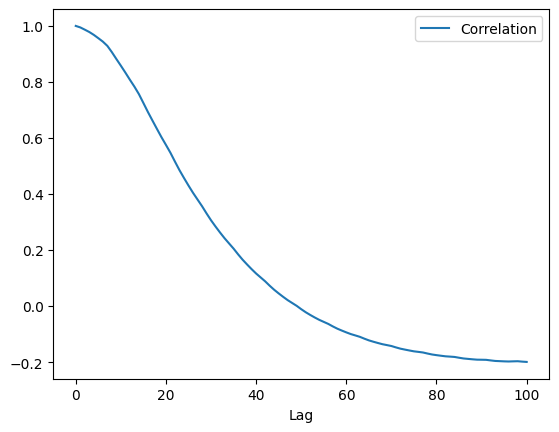

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(y_dataset, y_dataset, 100))
print(l)
l.plot()
plt.savefig('df.png')

To automate this process, let's make a universal function for time series transformation to create this DataSet.


In [ ]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

 When forecasting time series, the input and output fields are the same, only shifted by the lag.


In [ ]:
dataset = series_to_supervised(pd.DataFrame(y_dataset), y_dataset, 15)
dataset

,new_cases(t-0),new_cases(t-1),new_cases(t-2),new_cases(t-3),new_cases(t-4),new_cases(t-5),new_cases(t-6),new_cases(t-7),new_cases(t-8),new_cases(t-9),new_cases(t-10),new_cases(t-11),new_cases(t-12),new_cases(t-13),new_cases(t-14),new_cases(t-15),new_cases
date,,,,,,,,,,,,,,,,,
2020-02-19,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-20,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-21,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-22,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-23,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,"2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","2,568.0000","3,157.0000","3,324.0000","2,202.0000"
2022-05-16,"1,569.0000","2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","2,568.0000","3,157.0000","1,569.0000"
2022-05-17,"1,829.0000","1,569.0000","2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","2,568.0000","1,829.0000"


As you can see, the first and last columns contain the same target data.
Now we should create input (**X**) and output (**Y**) .


In [ ]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['new_cases(t-1)', 'new_cases(t-2)', 'new_cases(t-3)', 'new_cases(t-4)',
       'new_cases(t-5)', 'new_cases(t-6)', 'new_cases(t-7)', 'new_cases(t-8)',
       'new_cases(t-9)', 'new_cases(t-10)', 'new_cases(t-11)',
       'new_cases(t-12)', 'new_cases(t-13)', 'new_cases(t-14)',
       'new_cases(t-15)'],
      dtype='object')
Target: new_cases


### Data normalization


After that, we should normalize all the data. To do this, the **sklearn.preprocessing.MinMaxScaler** module should be used.
It allows us to normalize **fit_transform()** and convert back all the data easily: **inverse_transform()**.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

After that, we are going to form training and test DataSets using **sklearn.model_selection.train_test_split()**.

We will make them at the ratio of 73/27. Without shuffling. It means, that test samples are located in the end of **X** and **Y** DataSets.

Input normalized DataSets: **X_train, X_test**

Target normalized DataSets: **y_train, y_test**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.25, shuffle=False)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(615, 15)
(615, 1)
(206, 15)
(206, 1)


All the data is normalized now. However, in order to compare to results, we need real scale data of the training and test DataSet:


In [ ]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Target real scale DataSets: **res_train, res_test**.


# ARIMA

In [ ]:
!pip install pmdarima

In [ ]:

# fit an ARIMA model and plot residual errors
# from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

from matplotlib import pyplot
# load dataset
auto_arima_model=auto_arima(y_train,trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3262.895, Time=8.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3210.051, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3220.405, Time=1.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3221.766, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3212.046, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3217.766, Time=2.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3226.707, Time=6.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3259.538, Time=8.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3220.154, Time=1.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3222.373, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3222.074, Time=1.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3225.295, Time=0.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-3321.522, Time=1.92 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-3285.045, Time=5.68 sec
 ARIMA(3,1,4)(0,0,0

In [ ]:
arima_model_313 = ARIMA(y_train, order=(3,1,3)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
arima_model_313.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  615
Model:                 ARIMA(3, 1, 3)   Log Likelihood                1694.299
Date:                Sun, 02 Mar 2025   AIC                          -3374.599
Time:                        10:10:20   BIC                          -3343.659
Sample:                             0   HQIC                         -3362.567
                                - 615                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5326      0.016     32.356      0.000       0.500       0.565
ar.L2         -0.5196      0.018    -28.897      0.000      -0.555      -0.484
ar.L3          0.9493      0.015     62.395      0.000       0.919       0.979
ma.L1         -0.4008      0.025    -15.954      0.000      -0.450      -0.352
ma.L2          0.4774      0.029     16.341      0.000       0.420       0.535
ma.L3         -0.7758      0.028    -27.380      0.000      -0.831      -0.720
sigma2         0.0002   6.18e-06     37.632      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2792.18
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               7.28   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = dataset.index.get_loc('2020-05-1')
end = dataset.index.get_loc('2022-02-02')
print(start,'to',end)


72 to 714


In [ ]:
pred_future_10101=arima_model_313.predict(start=len(dataset)+1,end=len(dataset)+(180),dynamic=False)
print("The length of pred_future values :",len(pred_future_10101))
pred_future_10101

The length of pred_future values : 180


array([-0.022978  , -0.02307531, -0.02309086, -0.02307008, -0.02314332,
       -0.02320788, -0.02318448, -0.02320801, -0.02329397, -0.02330533,
       -0.02328904, -0.02335608, -0.02341102, -0.02338999, -0.02341388,
       -0.02348969, -0.02349769, -0.02348524, -0.02354642, -0.02359306,
       -0.02357431, -0.02359815, -0.02366488, -0.02367022, -0.02366103,
       -0.02371671, -0.0237562 , -0.02373959, -0.02376307, -0.0238217 ,
       -0.02382496, -0.02381852, -0.02386906, -0.02390241, -0.02388781,
       -0.02391067, -0.0239621 , -0.02396375, -0.02395961, -0.02400537,
       -0.02403346, -0.02402071, -0.02404277, -0.0240878 , -0.02408822,
       -0.024086  , -0.02412733, -0.02415091, -0.02413987, -0.02416099,
       -0.02420035, -0.02419987, -0.0241992 , -0.02423646, -0.0242562 ,
       -0.02424671, -0.02426678, -0.02430113, -0.0243    , -0.0243006 ,
       -0.02433411, -0.02435057, -0.0243425 , -0.02436146, -0.02439138,
       -0.0243898 , -0.02439141, -0.02442149, -0.02443518, -0.02

In [ ]:
history = [x for x in y_train]
predictions = list()
from pandas import read_csv
# from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from math import sqrt
# walk-forward validation
for t in range(len(y_test)):
	model = ARIMA(history, order=(3,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = y_test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %0.3f' % rmse)

predicted=0.030374, expected=0.032476
predicted=0.034108, expected=0.039006
predicted=0.036208, expected=0.034641
predicted=0.033083, expected=0.034557
predicted=0.035437, expected=0.030976
predicted=0.030725, expected=0.030213
predicted=0.026865, expected=0.025165
predicted=0.025136, expected=0.028738
predicted=0.030021, expected=0.031109
predicted=0.028746, expected=0.030732
predicted=0.029621, expected=0.026387
predicted=0.027937, expected=0.026138
predicted=0.025498, expected=0.027712
predicted=0.024556, expected=0.024448
predicted=0.024594, expected=0.027683
predicted=0.029174, expected=0.031606
predicted=0.030209, expected=0.030218
predicted=0.029181, expected=0.028610
predicted=0.030839, expected=0.027212
predicted=0.027612, expected=0.024697
predicted=0.021674, expected=0.021403
predicted=0.021544, expected=0.024619
predicted=0.025682, expected=0.028777
predicted=0.027329, expected=0.026814
predicted=0.025731, expected=0.024873
predicted=0.026843, expected=0.025322
predicted=0.

In [ ]:
y_test=y_test.flatten()
y_test

array([3.24755908e-02, 3.90064415e-02, 3.46412740e-02, 3.45567713e-02,
       3.09762716e-02, 3.02133331e-02, 2.51649010e-02, 2.87381576e-02,
       3.11090616e-02, 3.07324210e-02, 2.63865684e-02, 2.61378891e-02,
       2.77120535e-02, 2.44478353e-02, 2.76830811e-02, 3.16064203e-02,
       3.02181618e-02, 2.86101963e-02, 2.72122804e-02, 2.46965146e-02,
       2.14033241e-02, 2.46192550e-02, 2.87767874e-02, 2.68139106e-02,
       2.48727631e-02, 2.53218345e-02, 2.04931094e-02, 1.82984538e-02,
       2.24125276e-02, 2.20165722e-02, 2.54691106e-02, 2.00826678e-02,
       2.11836171e-02, 2.00609385e-02, 1.68763943e-02, 2.16182024e-02,
       2.35762504e-02, 2.22507654e-02, 2.07707611e-02, 0.00000000e+00,
       4.15294504e-02, 1.64707814e-02, 2.03748056e-02, 2.27408810e-02,
       2.02854742e-02, 1.92907569e-02, 1.90179339e-02, 1.77455648e-02,
       1.39646730e-02, 1.68619081e-02, 1.92521271e-02, 1.79797580e-02,
       0.00000000e+00, 1.72506205e-02, 3.29415628e-02, 1.28588950e-02,
      

<Axes: xlabel='date'>

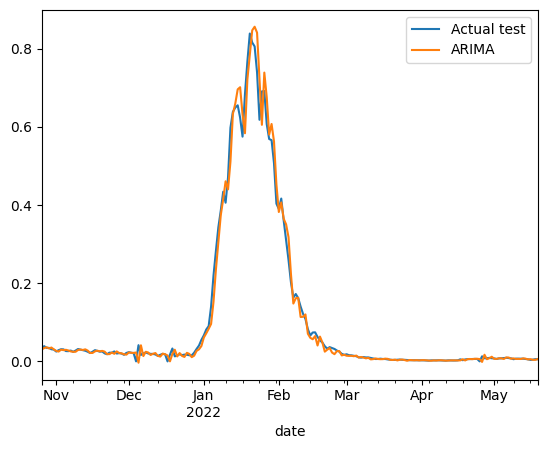

In [ ]:
df_2 = pd.DataFrame({'Actual test': y_test, 'ARIMA': predictions,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()

##AIC Calculation


Given the time series data $ y = (23, 54, 65, 78, 36) $, we fit an ARMA(1,1) model to the data and obtain the residuals.

Let $ n $ be the number of observations, $ \sigma^2 $ be the estimated variance of the residuals, and $ p $ be the number of parameters in the model.

The likelihood function for the ARMA(1,1) model is given by:

$$
L(\phi, \theta | y) = \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right)^n \exp \left( -\frac{1}{2\sigma^2} \sum_{t=1}^{n} (y_t - \phi y_{t-1} - \theta \epsilon_{t-1})^2 \right)
$$

The log-likelihood function is obtained by taking the natural logarithm of the likelihood function:

$$
\log L(\phi, \theta | y) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=1}^{n} (y_t - \phi y_{t-1} - \theta \epsilon_{t-1})^2
$$

Substituting the given data and estimated parameters, we can calculate the log-likelihood.

For the provided data:
$$
\begin{align*}
n & = 5 \\
y & = (23, 54, 65, 78, 36)
\end{align*}
$$

We obtain the residuals $ \epsilon_{t-1} $ from the fitted ARMA(1,1) model.

Using the obtained residuals, we can compute the log-likelihood and subsequently the likelihood.



\textbf{Given data:}
$$
\begin{array}{cccccc}
t & : & 0 & 1 & 2 & 3 \\
y & : & 23 & 54 & 65 & 78 \\
\end{array}
$$

\textbf{ARMA(1,1) Model Parameters:}
$$
\phi_1 = 0.5, \quad \theta_1 = 1.2, \quad \sigma^2 = 3.2
$$

\textbf{Log-Likelihood Calculation:}

The log-likelihood function for the ARMA(1,1) model is:
$$
\begin{aligned}
\log L(\phi_1, \theta_1 | y) &= -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=2}^{n} (y_t - \phi_1 y_{t-1} - \theta_1 \epsilon_{t-1})^2 \\
&= -\frac{4}{2} \log(2\pi \times 3.2) - \frac{1}{2 \times 3.2} \sum_{t=2}^{4} (y_t - 0.5 y_{t-1} - 1.2 \epsilon_{t-1})^2 \\
&= -2 \log(2\pi \times 3.2) - \frac{1}{6.4} \sum_{t=2}^{4} (y_t - 0.5 y_{t-1} - 1.2 \epsilon_{t-1})^2 \\
&= -2 \log(6.4\pi) - \frac{1}{6.4} [(54 - 0.5 \times 23 - 1.2 \times 0)^2 \\
&\quad + (65 - 0.5 \times 54 - 1.2 \times 23)^2 \\
&\quad + (78 - 0.5 \times 65 - 1.2 \times 54)^2] \\
&= -2 \times 3.215 - \frac{1}{6.4} [750.69 + 197.21 + 237.69] \\
&= -6.43 - \frac{1}{6.4} \times 1185.59 \\
&= -6.43 - 185.248 \\
&= -191.678
\end{aligned}
$$

\textbf{Number of Parameters:}
For the ARMA(1,1) model, there are two parameters: $ \phi_1 $ and $ \theta_1 $.

\textbf{AIC Calculation:}

Using the formula:
$$ AIC = -2 \times \text{log-likelihood} + 2 \times \text{number of parameters} $$

Substitute the values obtained into the formula:
$$ AIC = -2 \times (-191.678) + 2 \times 2 $$
$$ AIC = 383.356 + 4 $$
$$ AIC = 387.356 $$

So, the AIC for the ARMA(1,1) model with $ \phi_1 = 0.5 $, $ \theta_1 = 1.2 $, and $ \sigma^2 = 3.2 $ using the provided data is $ 387.356 $.



\textbf{Given data:}
$$
\begin{array}{cccccc}
t & : & 0 & 1 & 2 & 3 \\
y & : & 23 & 54 & 65 & 78 \\
\end{array}
$$

\textbf{ARMA(1,1) Model Parameters:}
$$
\phi_1 = 1.5, \quad \theta_1 = 0.6, \quad \sigma^2 = 3.2
$$

\textbf{Log-Likelihood Calculation:}

The log-likelihood function for the ARMA(1,1) model is:
$$
\begin{aligned}
\log L(\phi_1, \theta_1 | y) &= -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=2}^{n} (y_t - \phi_1 y_{t-1} - \theta_1 \epsilon_{t-1})^2 \\
&= -\frac{4}{2} \log(2\pi \times 3.2) - \frac{1}{2 \times 3.2} \sum_{t=2}^{4} (y_t - 1.5 y_{t-1} - 0.6 \epsilon_{t-1})^2 \\
&= -2 \log(2\pi \times 3.2) - \frac{1}{6.4} \sum_{t=2}^{4} (y_t - 1.5 y_{t-1} - 0.6 \epsilon_{t-1})^2 \\
&= -2 \log(6.4\pi) - \frac{1}{6.4} [(54 - 1.5 \times 23 - 0.6 \times 0)^2 \\
&\quad + (65 - 1.5 \times 54 - 0.6 \times 23)^2 \\
&\quad + (78 - 1.5 \times 65 - 0.6 \times 54)^2] \\
&= -2 \times 3.215 - \frac{1}{6.4} [315.69 + 342.09 + 213.69] \\
&= -6.43 - \frac{1}{6.4} \times 871.47 \\
&= -6.43 - 135.98 \\
&= -142.41
\end{aligned}
$$

\textbf{Number of Parameters:}
For the ARMA(1,1) model, there are two parameters: $ \phi_1 $ and $ \theta_1 $.

\textbf{AIC Calculation:}

Using the formula:
$$ AIC = -2 \times \text{log-likelihood} + 2 \times \text{number of parameters} $$

Substitute the values obtained into the formula:
$$ AIC = -2 \times (-142.41) + 2 \times 2 $$
$$ AIC = 284.82 + 4 $$
$$ AIC = 288.82 $$

So, the AIC for the ARMA(1,1) model with $ \phi_1 = 1.5 $, $ \theta_1 = 0.6 $, and $ \sigma^2 = 3.2 $ using the provided data is $ 288.82 $.



In [ ]:
import numpy as np
import statsmodels.api as sm

# Given data
y = np.array([23, 54, 65, 78, 36])

# Fit ARMA(1,1) model
arma_model = sm.tsa.ARMA(y, order=(1, 1))
arma_result = arma_model.fit()

# Get residuals
residuals = arma_result.resid

# Number of observations
n = len(y)

# Number of parameters
num_params = 2  # AR(1) and MA(1) parameters

# Estimate sigma^2
sigma_squared = np.var(residuals)

# Compute likelihood
likelihood = (1 / np.sqrt(2 * np.pi * sigma_squared)) ** n \
    * np.exp(-0.5 * np.sum((residuals / np.sqrt(sigma_squared)) ** 2))

# Compute log-likelihood
log_likelihood = -0.5 * n * np.log(2 * np.pi * sigma_squared) \
    - 0.5 * np.sum((residuals / np.sqrt(sigma_squared)) ** 2)

print("Likelihood:", likelihood)
print("Log-Likelihood:", log_likelihood)


In [ ]:
import numpy as np
import statsmodels.api as sm

# Given data
y = np.array([23, 54, 65, 78, 36])

# Fit ARMA(1,1) model
arma_model = sm.tsa.ARMA(y, order=(1, 1))
arma_result = arma_model.fit()

# Get residuals
residuals = arma_result.resid

# Number of observations
n = len(y)

# Number of parameters
num_params = 2  # AR(1) and MA(1) parameters

# Estimate sigma^2
sigma_squared = np.var(residuals)

# Compute log-likelihood
log_likelihood = -0.5 * n * np.log(2 * np.pi * sigma_squared) \
    - 0.5 * np.sum((residuals[1:] - arma_result.params[0] * residuals[:-1])**2 / sigma_squared)

# Calculate AIC
aic = -2 * log_likelihood + 2 * num_params

print("AIC:", aic)


In [ ]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# Given data
y = np.array([23, 54, 65, 78, 36])

# Fit ARMA(1,1) model
arma_model = AutoReg(y, lags=1, trend='c', seasonal=False)
arma_result = arma_model.fit()

# Get residuals
residuals = arma_result.resid

# Number of observations
n = len(y)

# Number of parameters
num_params = 2  # AR(1) and MA(1) parameters

# Estimate sigma^2
sigma_squared = np.var(residuals)

# Compute likelihood
likelihood = (1 / np.sqrt(2 * np.pi * sigma_squared)) ** n \
    * np.exp(-0.5 * np.sum((residuals / np.sqrt(sigma_squared)) ** 2))

# Compute log-likelihood
log_likelihood = -0.5 * n * np.log(2 * np.pi * sigma_squared) \
    - 0.5 * np.sum((residuals / np.sqrt(sigma_squared)) ** 2)

print("Likelihood:", likelihood)
print("Log-Likelihood:", log_likelihood)


In [ ]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

# Given data
y = np.array([23, 54, 65, 78, 36])

# Fit ARMA(1,1) model
arma_model = AutoReg(y, lags=1, trend='c', seasonal=False)
arma_result = arma_model.fit()

# Get residuals
residuals = arma_result.resid

# Number of observations
n = len(y)

# Number of parameters
num_params = 2  # AR(1) and MA(1) parameters

# Estimate sigma^2
sigma_squared = np.var(residuals)

# Compute likelihood
likelihood = (1 / np.sqrt(2 * np.pi * sigma_squared)) ** n \
    * np.exp(-0.5 * np.sum((residuals / np.sqrt(sigma_squared)) ** 2))

# Compute log-likelihood
log_likelihood = -0.5 * n * np.log(2 * np.pi * sigma_squared) \
    - 0.5 * np.sum((residuals / np.sqrt(sigma_squared)) ** 2)

# Calculate AIC
aic = -2 * log_likelihood + 2 * num_params

print("Likelihood:", likelihood)
print("Log-Likelihood:", log_likelihood)
print("AIC:", aic)
